In [1]:
#%matplotlib notebook
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from matplotlib          import cm
from mpl_toolkits.mplot3d import Axes3D
import math
from tqdm import tqdm

In [2]:
n = 10.
b = 8.
s = 10.

In [3]:
def GetLnQ(n_,b_,s_,mu_):
    
    Q = 2.*(mu_*s_ - n_*np.log(1.+(mu_*s_/b_)))
    
    return Q

In [4]:
q = GetLnQ(n,b,s,0.59)
print(q)

0.7510540308637967


In [5]:
def Sampler(n_,b_,s_,mu_,N=int(1e5)):
    
    H0 = np.random.poisson(b_, N)
    H1 = np.random.poisson(b_+mu_*s_,N)
    
    Obs = GetLnQ(n_,b_,s_,mu_)
    
    q0 = GetLnQ(H0,b_,s_,mu_)
    q1 = GetLnQ(H1,b_,s_,mu_)
    
    return Obs, q0, q1

In [6]:
def GetHisto(l_,bins_, norm=True):
    
    H1, bines = np.histogram(l_,bins=bins_)
    w = np.diff(bines)
    
    if norm:
        H1 = H1 / (np.sum(H1*w))
    
    return H1,bines,w

In [7]:
def GetPvalue(H,bins,w,Obs):
    
    p = 0.

    for i in range(len(H)):
    
        if bins[i] >= Obs:
             p += H[i]*w[i]
    
    return p

In [8]:
def GetMethod(n_,b_,s_,mu_,N=int(1e6),CL=1.0):
      
    Obs, q0, q1 = Sampler(n_,b_,s_,mu_)
    
    bins = np.linspace(-40,40,1000)
    
    Hq0, bq0, wq0 = GetHisto(q0,bins,True)
    Hq1, bq1, wq1 = GetHisto(q1,bins,True)
    HO, bO, wO = GetHisto(Obs,bins,True)
    
    HO = HO/ (np.sum(HO*wO)) * 0.2
    
    
    p0 = GetPvalue(Hq0,bq0,wq0,Obs)
    p1 = GetPvalue(Hq1,bq1,wq1,Obs)
    
    if p0 != 0.:
        CL = p1/p0
    
    #print(CL)
    
    #plt.plot(bq0[0:-1],Hq0, color='k')
    #plt.bar(bq0[0:-1],Hq0,width=wq0, color='b',ec='k')
    #plt.bar(bq1[0:-1],Hq1,width=wq1, color='r',ec='k')
    #plt.bar(bO[0:-1],HO,width=wO, color='g',ec='g')
    
    #plt.close()
    #plt.yscale('log')
    
    return CL

In [9]:
CL = GetMethod(n,b,s,0.58,1.0)
print(CL)

0.16776071773482398


In [10]:
POI = np.linspace(0.,1.5,50)

CL = np.zeros(len(POI))

p = np.zeros(len(POI))

for i in tqdm(range(len(POI))):
    CL[i] = GetMethod(n,b,s,POI[i])
    p[i] = 0.05
    

100%|██████████| 50/50 [00:02<00:00, 22.57it/s]


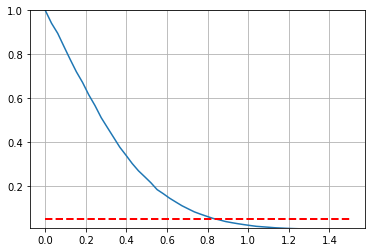

In [11]:
plt.plot(POI,CL)
plt.plot(POI,p,'r--',linewidth=2)
plt.grid()
plt.ylim(0.01,1)
#plt.yscale('log')
plt.show()

In [12]:
ii = CL <= 0.05 
print(CL[ii][0], POI[ii][0])

(0.0463165266106442, 0.8571428571428571)
